Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

Преобразуйте данные:
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
b. закодируйте категориальные переменные числовыми значениями по необходимости.

Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b. *может ли ROC-кривая проходить ниже диагонали?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from numpy import arange

In [ ]:
df_athletes = pd.read_csv('athletes.csv')
df_athletes.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [ ]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
# процент пропусков по столбцам, пропусков немного
df_athletes.isna().mean()*100

id             0.000000
name           0.000000
nationality    0.000000
sex            0.000000
dob            0.008667
height         2.860114
weight         5.711562
sport          0.000000
gold           0.000000
silver         0.000000
bronze         0.000000
dtype: float64

In [ ]:
'Дополнительное исследование показало что строк с пропусками примерно 6% от выборки, принимаем решение - удалить'

df_athletes = df_athletes.dropna()
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [ ]:
# какое кол-во уникальных значений принимают категориальные столбцы
for c in df_athletes.select_dtypes(exclude=['int64', 'float64']).columns:
    print(f'{c}: {len(df_athletes[c].unique())}')

name: 10840
nationality: 200
sex: 2
dob: 5453
sport: 27


In [ ]:
# принято решение работать с двумя признаками
y = df_athletes['sex'].replace({"male": 0, "female": 1})
X = df_athletes[['height', 'weight']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.7736587612249597

In [ ]:
model.score(X_test, y_test)

0.7767034990791897

In [ ]:
predictions = model.predict_proba(X_test)

In [ ]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

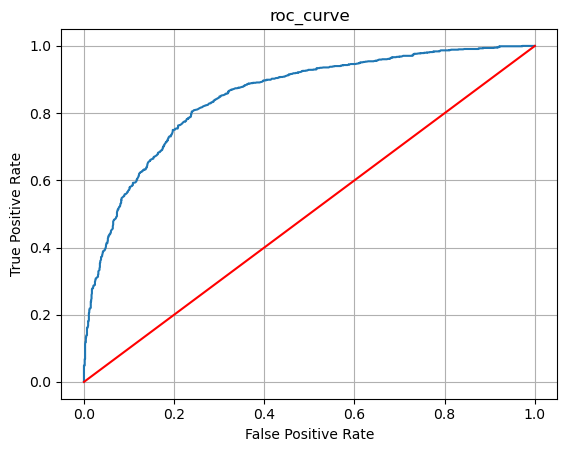

In [ ]:
plt.plot(fpr, tpr)
plt.title('roc_curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1],[0, 1], color='red')
plt.grid()

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.8505357607237687

In [ ]:
fpr2 = []
tpr2 = []
precision2 = []


for threshold in arange(0, 1, 0.01):
    tp, fp, fn, tn = 0, 0, 0, 0
    for predicted_prob, actual in zip(predictions[:, 1], y_test):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr2.append(tp / (tp + fn))
    fpr2.append(fp/(fp + tn))
    precision2.append(tp / (tp + fp))

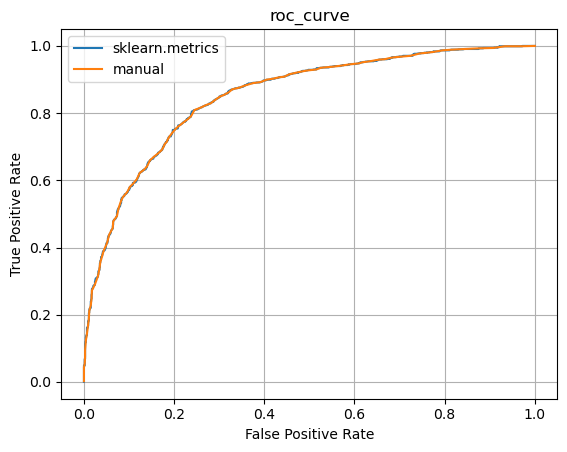

In [ ]:
plt.plot(fpr, tpr, label='sklearn.metrics')
plt.plot(fpr2, tpr2, label='manual')
plt.title('roc_curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()

Расчет roc_curve совпал с ручным так как алгоритм тот же

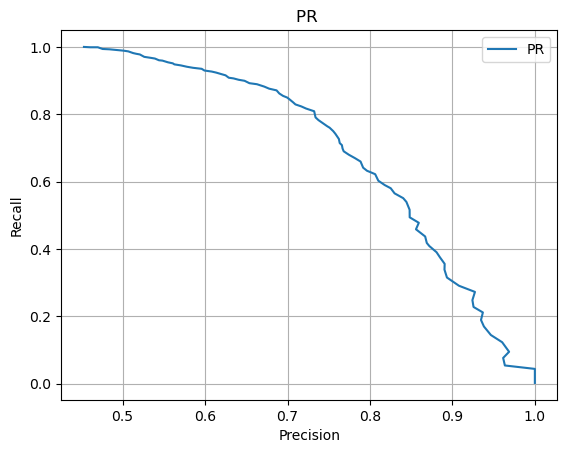

In [ ]:
plt.plot(precision2, tpr2, label='PR')
plt.title('PR ')
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.legend(loc=0)
plt.grid()
plt.show()

In [ ]:

auc = 0

for i in range(len(fpr2) - 1):
    fpr2_delta = abs(fpr2[i+1] - fpr2[i])
    auc += (fpr2_delta  * tpr2[i] + (tpr2[i+1] - tpr2[i]) * fpr2_delta  / 2)

auc

0.8504228429279244

Полученное значение совпало с расчитанным с помощью roc_auc_score

Модель получилось довольно точной, способность различать классы 85%


если модель совпадет с диагональю - способность правильно квалифицировать 50%, это собственно все равно что просто угадывать, если меньше 0.5 - вопрос в правильности подготовки данных, настройки классификатора
